In [1]:
!pip install deepface opencv-python matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.2/169.2 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.9/115.9 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.7/169.7 kB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.4/59.4 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 39.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 69.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.3/45.3 kB 3.6 MB/s eta 0:00:00


In [2]:
from deepface import DeepFace
import cv2
import matplotlib.pyplot as plt


26-02-01 14:28:38 - Directory /root/.deepface has been created
26-02-01 14:28:38 - Directory /root/.deepface/weights has been created


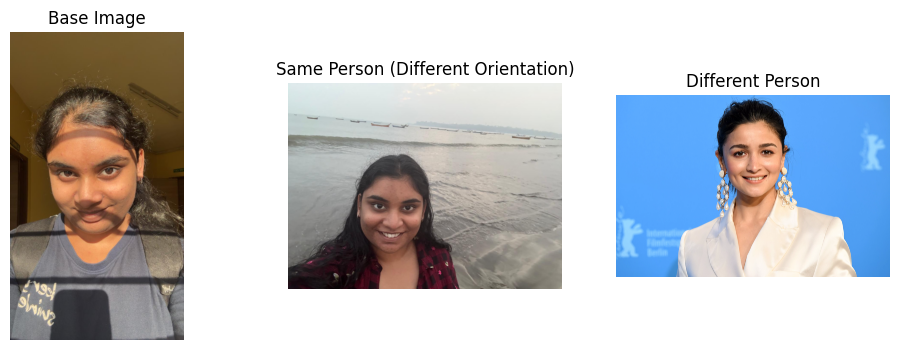

In [9]:
base_img = cv2.imread("base.jpg")
same_img = cv2.imread("same_face.jpg")
diff_img = cv2.imread("different.jpg")

base_img = cv2.cvtColor(base_img, cv2.COLOR_BGR2RGB)
same_img = cv2.cvtColor(same_img, cv2.COLOR_BGR2RGB)
diff_img = cv2.cvtColor(diff_img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
plt.imshow(base_img)
plt.title("Base Image")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(same_img)
plt.title("Same Person (Different Orientation)")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(diff_img)
plt.title("Different Person")
plt.axis("off")

plt.show()


In [12]:
result_same = DeepFace.verify(
    img1_path="base.jpg",
    img2_path="same_face.jpg",
    model_name="Facenet"
)

print("Is same person?", result_same["verified"])
print("Distance:", result_same["distance"])


Is same person? True
Distance: 0.353807


In [13]:
result_diff = DeepFace.verify(
    img1_path="base.jpg",
    img2_path="different.jpg",
    model_name="Facenet"
)

print("Is same person?", result_diff["verified"])
print("Distance:", result_diff["distance"])


Is same person? False
Distance: 0.895384


In [14]:
if result_same["verified"]:
    print("✅ Base image MATCHES with rotated/angled image")
else:
    print("❌ Base image does NOT match rotated image")

if result_diff["verified"]:
    print("❌ Base image MATCHES with different person (unexpected)")
else:
    print("✅ Base image does NOT match different person")


✅ Base image MATCHES with rotated/angled image
✅ Base image does NOT match different person
